# TITANIC DATA IMPORTATION

In [138]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [83]:
#importing the data
df=pd.read_csv('train.csv')

## GETTING FARMILIAR WITH THE DATA

In [84]:
#preview of the data
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [85]:
df.tail(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [86]:
#summary of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [87]:
#Dimensions of the data
df.shape
## we have 891 rows and 12 columns in the data

(891, 12)

In [88]:
#Checking the datatypes
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

## Checking for Null and Duplicate Values

In [89]:
#are there any null values in the data?
df.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [90]:
#Checking the percentage of null values in each column
df.isna().sum()/len(df)*100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

<Axes: >

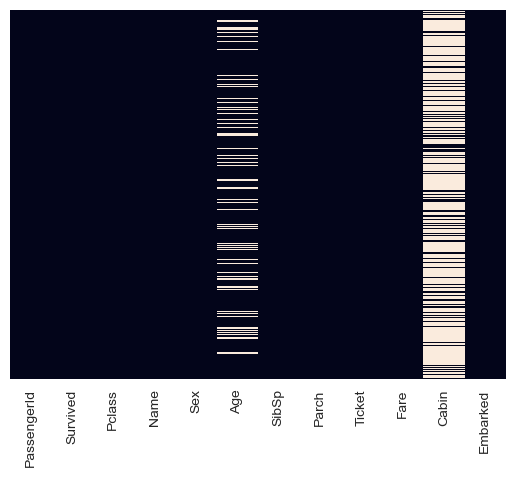

In [91]:
# visual of missing data
sns.heatmap(df.isnull(),yticklabels=False, cbar=False)

###### -19.87% of entries in the age column are missing.
###### -77.10% of entries in the cabin column are missing. This is a significant amount of data missing.
###### -0.22% of entries in the embarked column are missing.

In [92]:
#are there duplicated values in the data?
df.duplicated().sum()

0

###### - no entry in the dataset is duplicated

### DATA CLEANING

In [93]:
#Filling the missing entries in the age column with the best fit value(mean)
df['Age']=df['Age'].fillna(df['Age'].mean())

In [94]:
#Changing the datatype of Age to Integer
df['Age']=df.Age.astype(int)

In [95]:
#Filling the missing entries in the Embarked column with the best fit value(mode)
df['Embarked']=df['Embarked'].fillna(df['Embarked'].mode()[0])

In [96]:
##After fixing/manipulating the data, what is the Statistical summary?
df.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.0,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.0,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.0,2.0000,3.0000,3.0,3.0000
Age,891.0,29.544332,13.013778,0.0,22.0000,29.0000,35.0,80.0000
SibSp,891.0,0.523008,1.102743,0.0,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.0,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.0,7.9104,14.4542,31.0,512.3292


## DATA VISUALIZATION

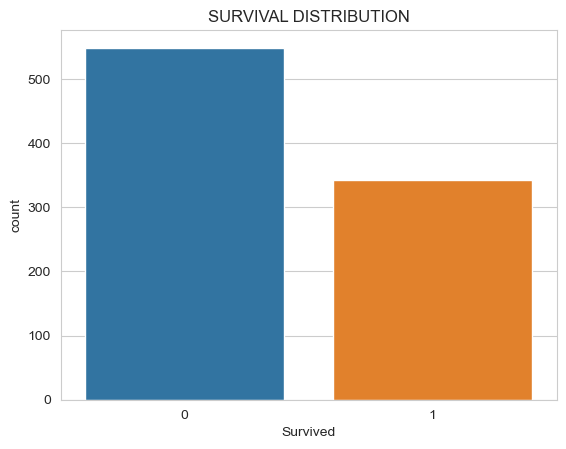

In [97]:
#Countof Survivors visualization
sns.countplot(x='Survived',data=df)
plt.title('SURVIVAL DISTRIBUTION')
plt.show()

###### -The number of survivors is far less than that of those who did not survive

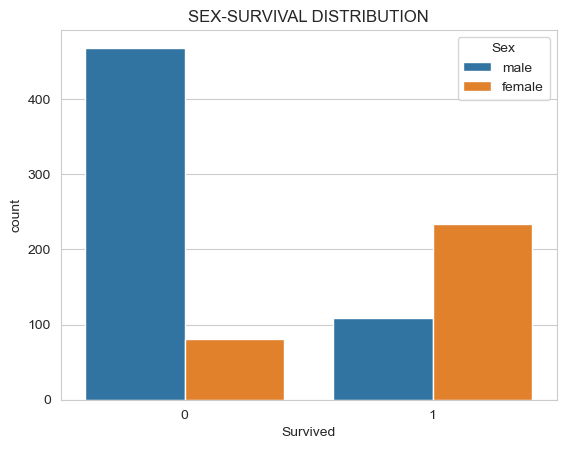

In [98]:
#how is the gender distribution in this same category?
sns.set_style('whitegrid')
sns.countplot(x='Survived', hue='Sex',data=df)
plt.title('SEX-SURVIVAL DISTRIBUTION')
plt.show()

###### -Females survived more than the males

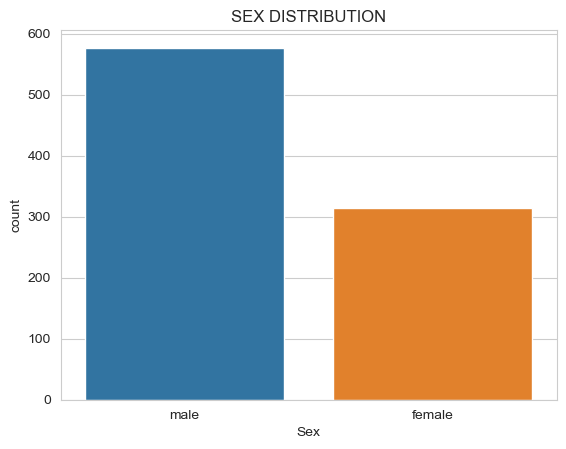

In [99]:
#but what is the gender distribution overally?
sns.countplot(x='Sex',data=df)
plt.title('SEX DISTRIBUTION')
plt.show()

###### - We have more males to females
###### - Data of close to 600 males was recorded
###### - Data of just over 300 females was recorded

C:\Users\ADMIN\Downloads\Apps and setup\SONEK DATA SCHOOL SOFTWARES\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


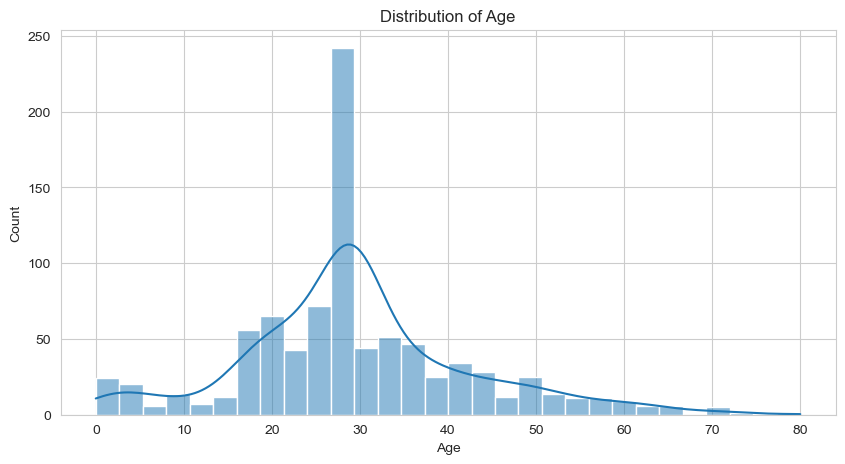

C:\Users\ADMIN\Downloads\Apps and setup\SONEK DATA SCHOOL SOFTWARES\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


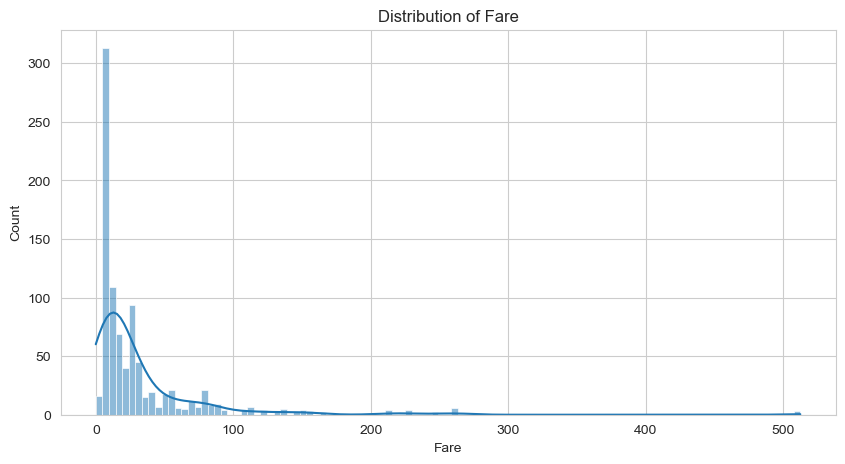

In [100]:
#distribution of age groups and fare payment of those that were on-board
numerical_cols=['Age','Fare']
for col in numerical_cols:
    fig, ax=plt.subplots(figsize=(10,5))
    sns.histplot(x=df[col],kde=True,ax=ax)
    plt.title(f"Distribution of {col}")
    plt.show()

###### - First Graph:This shows passengers aged between 20 and 30 were the most of all the age-groups
###### - Second Graph:Shows that most people on-board paid less than 100 pounds for their fare

C:\Users\ADMIN\Downloads\Apps and setup\SONEK DATA SCHOOL SOFTWARES\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


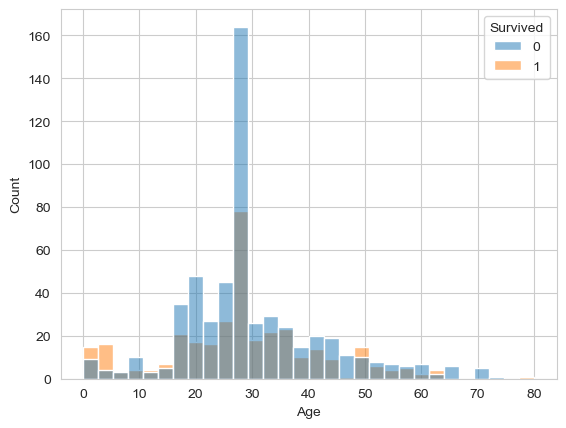

In [102]:
#WHat is the survival rate of different age groups
sns.histplot(x='Age', data=df, hue='Survived')
plt.show()

###### - More of the blue bars overlap the orange ones thus indicating that their were fewer survivors across most age-groups
###### - However, more passengers aged between 0-10 survived compared to their unfortunate counterparts

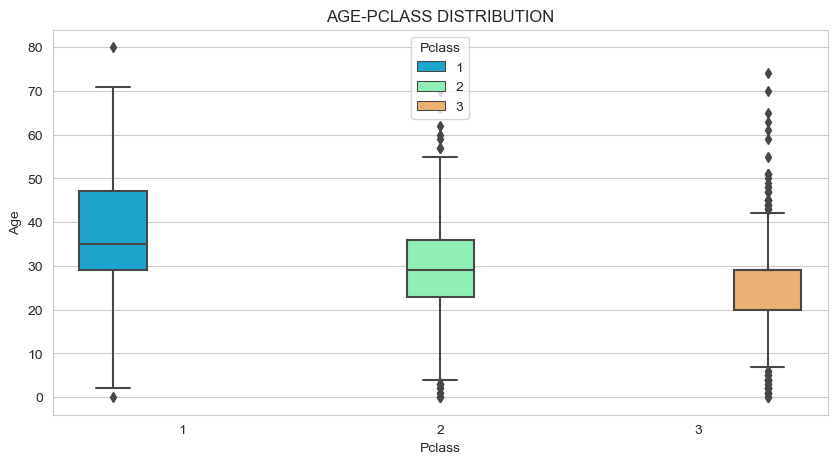

In [103]:
#Visual of the Survival rate distribution across the passenger classes
plt.figure(figsize=(10,5))
sns.boxplot(x='Pclass',data=df, y='Age',  hue='Pclass',palette='rainbow')
plt.title("AGE-PCLASS DISTRIBUTION")
plt.show()

###### - MOst passengers between age 50 and 80 boarded first class
###### - Passengers aged around 30 boarded the third class more

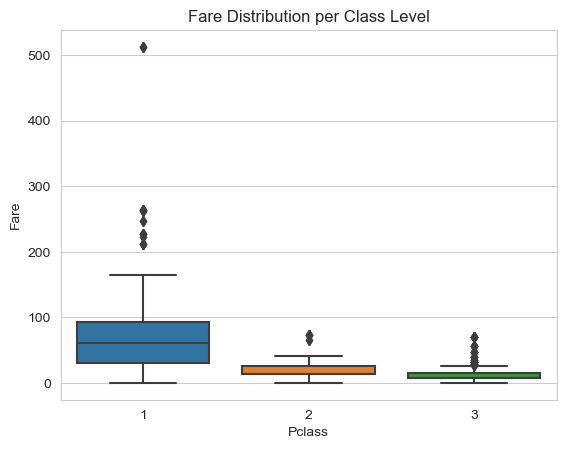

In [104]:
# Fare distribution per class level
sns.boxplot(x='Pclass', y='Fare', data=df);
plt.title('Fare Distribution per Class Level')
plt.show()

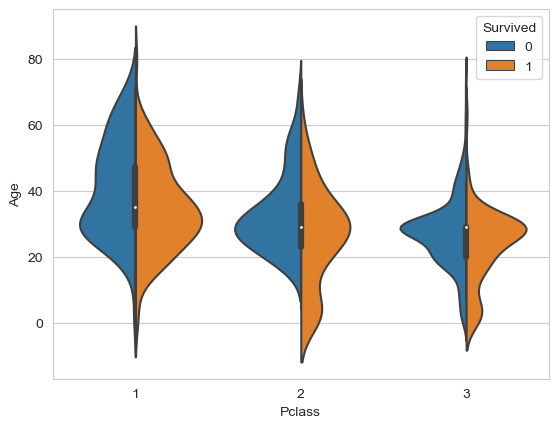

In [118]:
sns.violinplot(x='Pclass',y='Age',hue='Survived', split=True,data=df)
plt.show()

###### - firstclass passengers had a more diverse age range with a higher survival

## Logistic Regression Model

In [134]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.datasets import load_iris

# Load dataset (for this example, we use the Iris dataset)
data = df
X = df.drop('Cabin',axis=1)  # Features
y = df['Survived']  # Target

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Logistic Regression model
log_reg = LogisticRegression(max_iter=1000)

# Train the model
log_reg.fit(X_train, y_train)

# Make predictions on the test set
y_pred = log_reg.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print results
print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)


Accuracy: 1.00
Confusion Matrix:
[[105   0]
 [  0  74]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       105
           1       1.00      1.00      1.00        74

    accuracy                           1.00       179
   macro avg       1.00      1.00      1.00       179
weighted avg       1.00      1.00      1.00       179



### Visualization

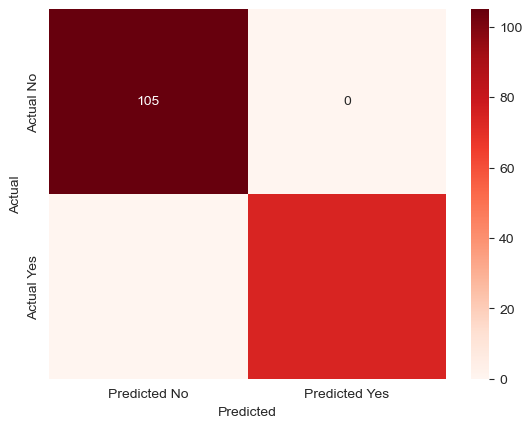

In [146]:

sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Reds',xticklabels=['Predicted No','Predicted Yes'],
           yticklabels=['Actual No','Actual Yes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## Decision Tree 

In [145]:

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Decision Tree Classifier model
dt_classifier = DecisionTreeClassifier(random_state=42)

# Train the model
dt_classifier.fit(X_train, y_train)

# Make predictions on the test set
predictions_t= dt_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, predictions_t)
conf_log= confusion_matrix(y_test, predictions_t)
class_report = classification_report(y_test, predictions_t)

# Print results
print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)


Accuracy: 1.00
Confusion Matrix:
[[105   0]
 [  0  74]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       105
           1       1.00      1.00      1.00        74

    accuracy                           1.00       179
   macro avg       1.00      1.00      1.00       179
weighted avg       1.00      1.00      1.00       179



## Visualization

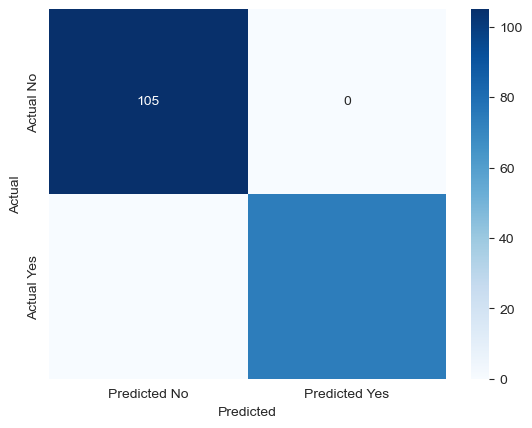

In [147]:
sns.heatmap(conf_log, annot=True, fmt='d', cmap='Blues',xticklabels=['Predicted No','Predicted Yes'],
           yticklabels=['Actual No','Actual Yes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()